# Import Modules

In [1]:
import cv2
import imageio
import skimage.util

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps

***
# Initialize and load original image

## - JPG Format

In [2]:

raw_image = imageio.imread('../images/jpg/fair_attraction.jpg')
# raw_image = imageio.imread('../images/jpg/mountain.jpg')

## - PNG Format

In [3]:
# raw_image = imageio.imread('../images/png/dice.png')
# raw_image = imageio.imread('../images/png/penguin.png')

## - Gray Format

In [4]:
# raw_image = imageio.imread('../images/gray/stinkbug.png')
# raw_image = imageio.imread('../images/gray/mri.png')

***
# Display original image and description

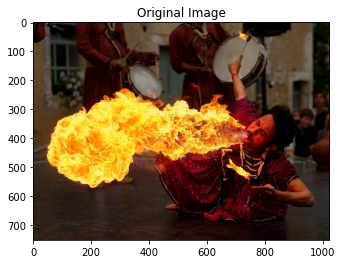

Height        : 752 pixels
Width         : 1024 pixels
Color channel : 3 (RGB)


In [5]:
plt.imshow(raw_image)
plt.title('Original Image')
plt.show()

print(f'Height        : {raw_image.shape[0]} pixels')
print(f'Width         : {raw_image.shape[1]} pixels')

if len(raw_image.shape) >= 3:
    if raw_image.shape[2] == 4:
        print(f'Color channel : {raw_image.shape[2]} (RGBA)')
    elif raw_image.shape[2] == 3:
        print(f'Color channel : {raw_image.shape[2]} (RGB)')

***
# Display original image histogram

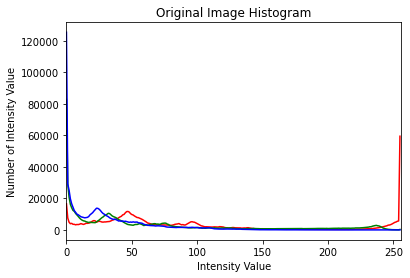

In [6]:
color = ('r', 'g', 'b') 

for i, col in enumerate(color): 
    histr = cv2.calcHist([raw_image], [i], None, [256], [0, 256])

    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Original Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Intensity Value')
plt.show()

***
# Show list value each pixel

In [7]:
raw_image

Array([[[29, 10,  4],
        [28,  9,  3],
        [27,  8,  2],
        ...,
        [24, 29,  7],
        [25, 30,  8],
        [26, 31,  9]],

       [[25,  6,  0],
        [25,  6,  0],
        [24,  5,  0],
        ...,
        [23, 28,  6],
        [24, 29,  7],
        [25, 30,  8]],

       [[21,  2,  0],
        [21,  2,  0],
        [22,  1,  0],
        ...,
        [23, 28,  6],
        [24, 29,  7],
        [24, 29,  7]],

       ...,

       [[51, 33, 23],
        [50, 32, 22],
        [49, 31, 21],
        ...,
        [45, 42, 37],
        [46, 43, 38],
        [47, 44, 39]],

       [[44, 26, 16],
        [46, 28, 18],
        [49, 31, 21],
        ...,
        [29, 26, 21],
        [28, 25, 20],
        [29, 26, 21]],

       [[50, 32, 22],
        [53, 35, 25],
        [56, 38, 28],
        ...,
        [27, 24, 19],
        [29, 26, 21],
        [32, 29, 24]]], dtype=uint8)

***
# Negative Image

- Nilai intensitas tertinggi akan dikurangi dengan nilai dari setiap piksel pada gambar, sehingga terjadi negasi pada nilai pixel awal
- Formula, sebagai berikut <b>x = m - f(x, y)</b>
- <b>m</b> adalah nilai intensitas piksel tertinggi
- <b>f(x, y)</b> adalah fungsi untuk mengambil nilai array dari setiap piksel pada gambar
- Memperjelas detail putih atau abu-abu yang disematkan di wilayah gelap pada gambar

### - Get height and width of the image

In [8]:
height, width, _ = raw_image.shape

print(f'Height : {height} pixels')
print(f'Width  : {width} pixels')

Height : 752 pixels
Width  : 1024 pixels


### - Change value each pixel with algorithm

- <b>Method-1</b>

In [9]:
img_negative = raw_image

# for i in range(0, height - 1): 
#     for j in range(0, width - 1):
#         # Get the pixel value 
#         pixel = img_negative[i, j]        

#         # Negate each channel by  
#         # subtracting it from 255

#         # 1st index contains red pixel
#         pixel[0] = 255 - pixel[0]
          
#         # 2nd index contains green pixel
#         pixel[1] = 255 - pixel[1]
          
#         # 3rd index contains blue pixel
#         pixel[2] = 255 - pixel[2] 
          
#         # Store new values in the pixel
#         img_negative[i, j] = pixel

- <b>Method 2 (Optimization)<b>

In [10]:
img_negative = 255 - raw_image

### - Show list value each pixel

In [11]:
img_negative

Array([[[226, 245, 251],
        [227, 246, 252],
        [228, 247, 253],
        ...,
        [231, 226, 248],
        [230, 225, 247],
        [229, 224, 246]],

       [[230, 249, 255],
        [230, 249, 255],
        [231, 250, 255],
        ...,
        [232, 227, 249],
        [231, 226, 248],
        [230, 225, 247]],

       [[234, 253, 255],
        [234, 253, 255],
        [233, 254, 255],
        ...,
        [232, 227, 249],
        [231, 226, 248],
        [231, 226, 248]],

       ...,

       [[204, 222, 232],
        [205, 223, 233],
        [206, 224, 234],
        ...,
        [210, 213, 218],
        [209, 212, 217],
        [208, 211, 216]],

       [[211, 229, 239],
        [209, 227, 237],
        [206, 224, 234],
        ...,
        [226, 229, 234],
        [227, 230, 235],
        [226, 229, 234]],

       [[205, 223, 233],
        [202, 220, 230],
        [199, 217, 227],
        ...,
        [228, 231, 236],
        [226, 229, 234],
        [223, 226, 231]]

### - Display the negative transformed image

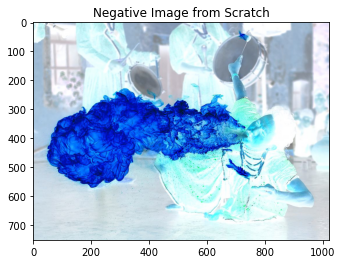

In [12]:
plt.imshow(img_negative)
plt.title('Negative Image from Scratch')
plt.show()

### - Histogram

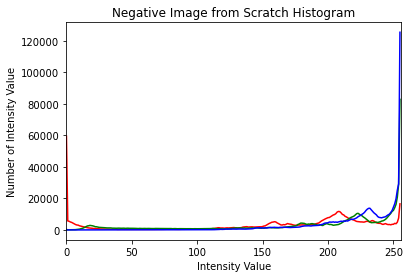

In [13]:
color = ('r', 'g', 'b')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([img_negative], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Negative Image from Scratch Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Intensity Value')
plt.show()

***
# With image processing module

### - Initialize and load original image

In [14]:
raw_image = imageio.imread('../images/jpg/fair_attraction.jpg')

### - Display original image

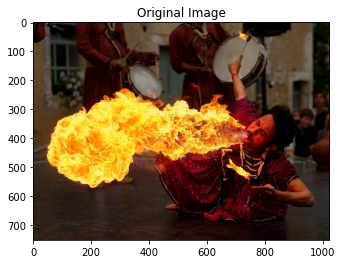

In [15]:
plt.imshow(raw_image)
plt.title('Original Image')
plt.show()

### - Negative image with scikit-image module

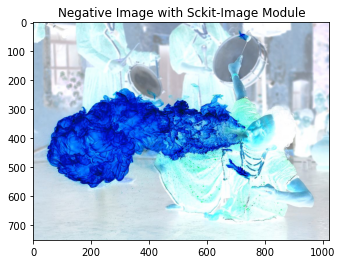

In [16]:
plt.imshow(skimage.util.invert(raw_image))
plt.title('Negative Image with Sckit-Image Module')
plt.show()

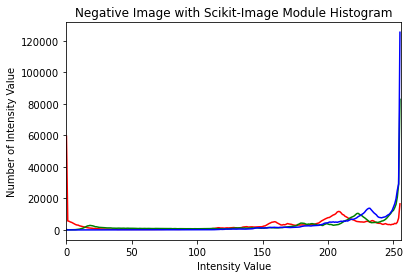

In [17]:
color = ('r', 'g', 'b')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([skimage.util.invert(raw_image)], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Negative Image with Scikit-Image Module Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Intensity Value')
plt.show()

### - Negative image with Open-CV

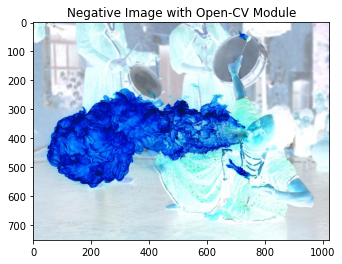

In [18]:
plt.imshow(cv2.bitwise_not(raw_image))
plt.title('Negative Image with Open-CV Module')
plt.show()

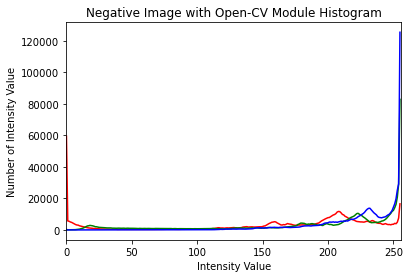

In [19]:
color = ('r', 'g', 'b')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([cv2.bitwise_not(raw_image)], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Negative Image with Open-CV Module Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Intensity Value')
plt.show()

### - Negative image with Pillow module

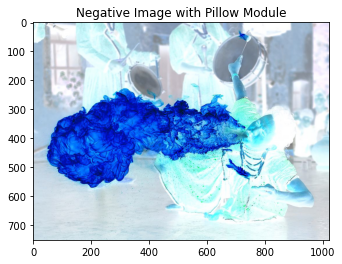

In [20]:
raw_image  = Image.open('../images/jpg/fair_attraction.jpg')
img_invert = np.asarray(ImageOps.invert(raw_image))

plt.imshow(img_invert)
plt.title('Negative Image with Pillow Module')
plt.show()

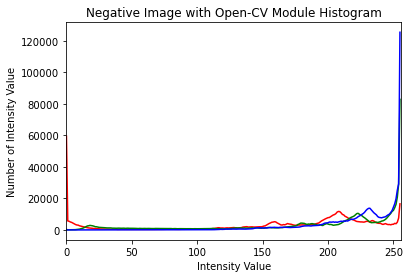

In [21]:
color = ('r', 'g', 'b')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([img_invert], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Negative Image with Open-CV Module Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Intensity Value')
plt.show()